In [1]:
import numpy as np
import numpy.random as rnd
import math as m
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import scipy

## 
# Считается по Нейману
##
l = 10
k = 5

def f(x) :
    return (k / l) * (x / l)**(k - 1) * np.exp(-(x / l)**k)

array_v = list()
a = 0
b = 10
n = 10000

array_v = list()
array_v = l * np.random.weibull(k, 1000)
plot = plt.hist(array_v, bins = 50)

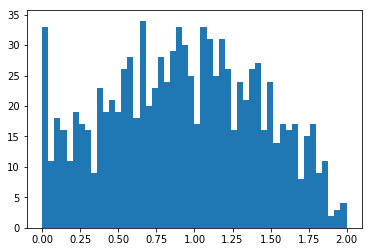

In [2]:
def getPower(array_v) :
    array_p = list()
    for var in array_v :
        if (var < 4) :
            array_p.append(0)
        elif (var < 15) :
            array_p.append(m.cos(var * m.pi / 11 + 7 * m.pi / 11) + 1)
        elif (var < 25) :
            array_p.append(7/4 + var / 30 - (var ** 2) / 900)
        else : 
            array_p.append(0)
    return array_p
array_p = getPower(array_v)
plot = plt.hist(array_p, bins = 50)

In [3]:
def mean_confidence_interval(data, confidence=0.95): 
    a = 1.0 * np.array(data) 
    n = len(a) 
    m, se = np.mean(a), scipy.stats.sem(a) 
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 
    return m, m-h, m+h 

# Рассчёт доверительного интервала
center, left, right = mean_confidence_interval(array_p) 
print(left, center, right)

0.8949849539511673 0.9258589680078648 0.9567329820645624


In [7]:
l = 1
k = 1.5
a = 4
b = 10

def inv_weibull(x, k, l):
    return l * ((- np.log(1 - x)) ** (1 / k))

def weibull(x, k, l):
    return 1 - np.exp(-((x / l) ** k))

U = np.random.uniform(0, 1, 1000)
X = [inv_weibull(weibull(a, k, l) + u * (weibull(b, k, l) - weibull(a, k, l)), k, l) for u in U]

(array([557., 276.,  99.,  42.,  16.,   8.,   1.,   0.,   0.,   1.]),
 array([4.0000296 , 4.2841123 , 4.56819501, 4.85227771, 5.13636042,
        5.42044312, 5.70452583, 5.98860853, 6.27269124, 6.55677394,
        6.84085665]),
 <a list of 10 Patch objects>)

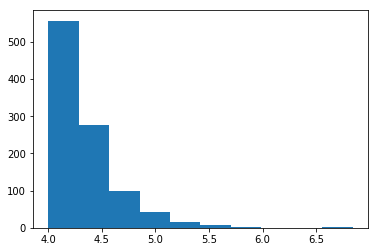

In [8]:
plt.hist(X)

In [6]:
array_p2 = getPower(X)
center, left, right = mean_confidence_interval(array_p2) 
print(left, center, right)

0.0074226221414200756 0.008448693083505425 0.009474764025590774
